Anushree.D  
CNN for CIFAR-1,
Simple convolutional neural network for CIFAR-10 image classification.



In [ ]:
# Imports and output folders
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs('results', exist_ok=True)
os.makedirs('models', exist_ok=True)

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [ ]:
# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_test:", x_test.shape, "y_test:", y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
x_train: (50000, 32, 32, 3) y_train: (50000, 1)
x_test: (10000, 32, 32, 3) y_test: (10000, 1)


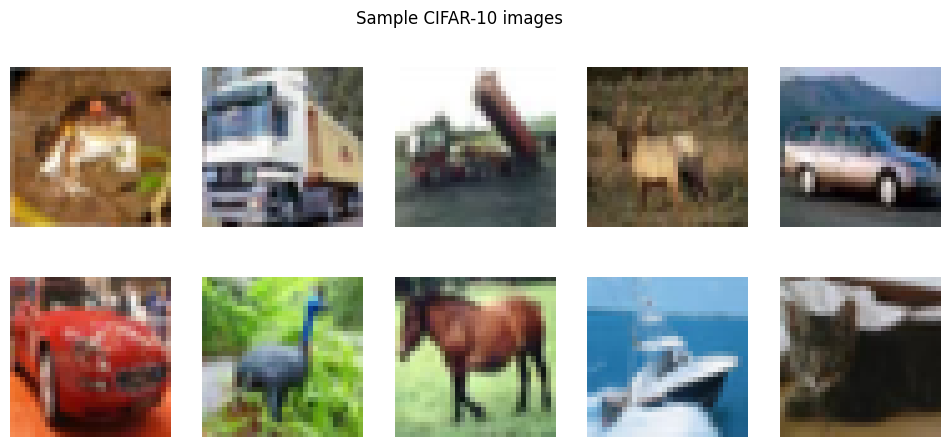

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,5, figsize=(12,5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.axis('off')
plt.suptitle("Sample CIFAR-10 images")
plt.show()


In [ ]:
data_augment = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.08),
])

model = models.Sequential([
    layers.Input(shape=(32,32,3)),
    data_augment,
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,143,242 (4.36 MB)

 Trainable params: 1,143,242 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=12, batch_size=64, validation_split=0.1)


Epoch 1/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3056 - loss: 1.8912 - val_accuracy: 0.5118 - val_loss: 1.3783
Epoch 2/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4774 - loss: 1.4540 - val_accuracy: 0.5868 - val_loss: 1.1541
Epoch 3/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5400 - loss: 1.2890 - val_accuracy: 0.6310 - val_loss: 1.0590
Epoch 4/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5757 - loss: 1.2033 - val_accuracy: 0.6584 - val_loss: 0.9798
Epoch 5/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5991 - loss: 1.1373 - val_accuracy: 0.6704 - val_loss: 0.9375
Epoch 6/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6205 - loss: 1.0880 - val_accuracy: 0.6958 - val_loss: 0.8899
Epoch 7/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6405 - loss: 1.0323 - val_accuracy: 0.6900 - val_loss: 0.8794
Epoch 8/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6518 - loss: 0.9937 - val_accuracy: 0

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

model.save('models/cnn_cifar10.h5')


313/313 - 1s - 4ms/step - accuracy: 0.7302 - loss: 0.7813


Test accuracy: 0.7301999926567078


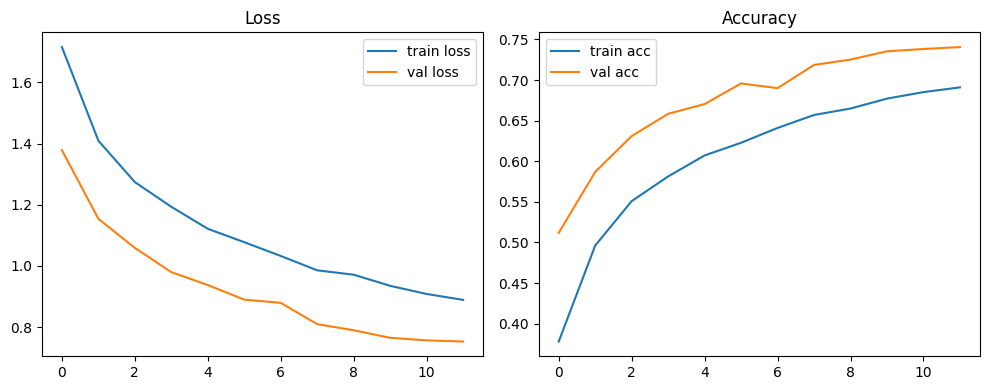

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.title('Accuracy')

plt.tight_layout()
plt.savefig('results/cnn_cifar10_training.png')
plt.show()
